# EDA
---
- 11/22

In [3]:
import pandas as pd
import polars as po
import tqdm

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as pl

In [4]:
df = pd.read_csv('vehicles_processed.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115988 entries, 0 to 115987
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            115988 non-null  int64  
 1   price         115988 non-null  int64  
 2   year          115988 non-null  float64
 3   manufacturer  115988 non-null  object 
 4   model         115988 non-null  object 
 5   condition     115988 non-null  object 
 6   cylinders     115988 non-null  object 
 7   fuel          115988 non-null  object 
 8   odometer      115988 non-null  float64
 9   transmission  115988 non-null  object 
 10  drive         115988 non-null  object 
 11  type          115988 non-null  object 
 12  paint_color   115988 non-null  object 
 13  description   115988 non-null  object 
dtypes: float64(2), int64(2), object(10)
memory usage: 12.4+ MB


## Basic EDA

### 연속형 데이터 
- 연도, 가격, odometer (주행 거리)

In [11]:
df['price'].max().index()

AttributeError: 'int' object has no attribute 'index'

In [5]:
def describe_and_plot(data, column_name):
    # 컬럼의 통계량 계산
    column_stats = data[column_name].describe()

    # 컬럼의 히스토그램 그리기
    plt.figure(figsize=(20, 6))
    if column_name == 'price':
        sns.histplot(data=data,x=column_name,color='skyblue',bins=500)
    
    if column_name == 'odometer':
        sns.histplot(data=data,x=column_name,color='skyblue',bins=1000)
    
    if column_name == 'year':
        sns.histplot(data=data,x=column_name,color='skyblue')
    plt.title(f'Histogram of {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.show()

    # 컬럼의 통계량 출력
    print(f"Statistics for {column_name}:")
    print(f"Mean: {column_stats['mean']}")
    print(f"Standard Deviation: {column_stats['std']}")
    print(f"Variance: {column_stats['std']**2}")
    print(f"Minimum: {column_stats['min']}")
    print(f"25th Percentile: {np.percentile(data[column_name], 25)}")
    print(f"Median (50th Percentile): {column_stats['50%']}")
    print(f"75th Percentile: {np.percentile(data[column_name], 75)}")
    print(f"Maximum: {column_stats['max']}")

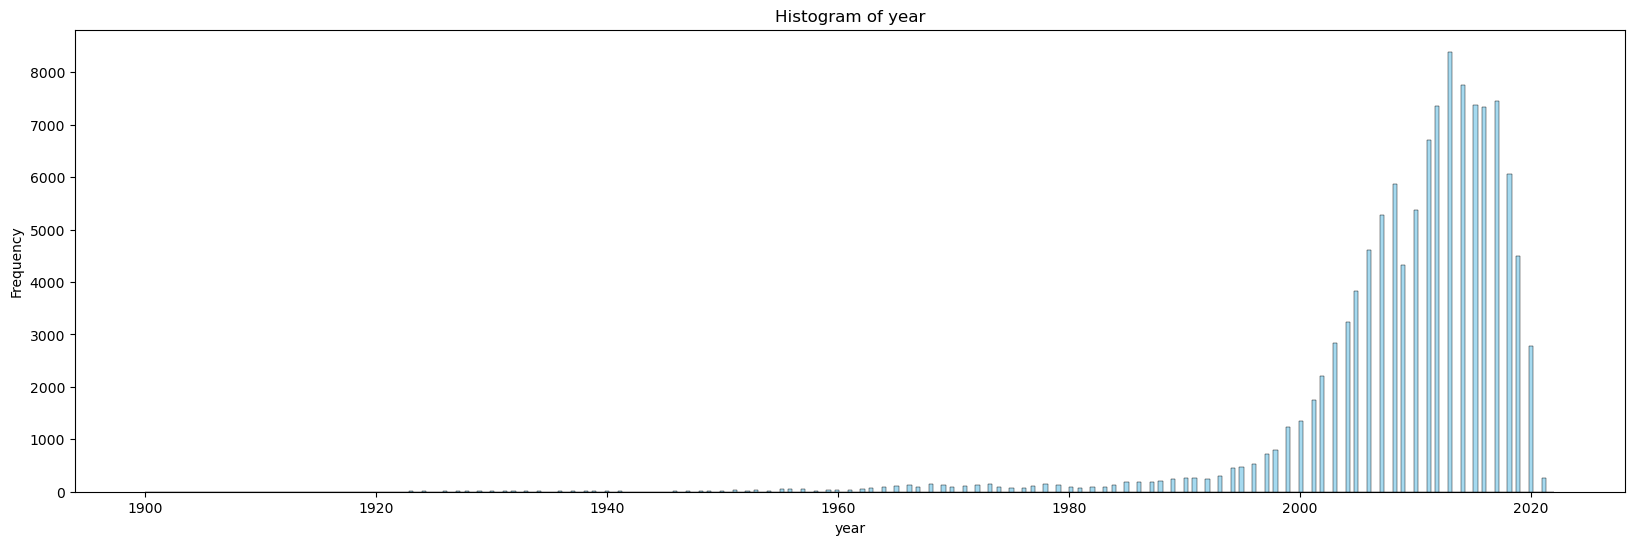

Statistics for year:
Mean: 2009.5570317619065
Standard Deviation: 9.595967547760306
Variance: 92.08259317766895
Minimum: 1900.0
25th Percentile: 2006.0
Median (50th Percentile): 2012.0
75th Percentile: 2015.0
Maximum: 2022.0


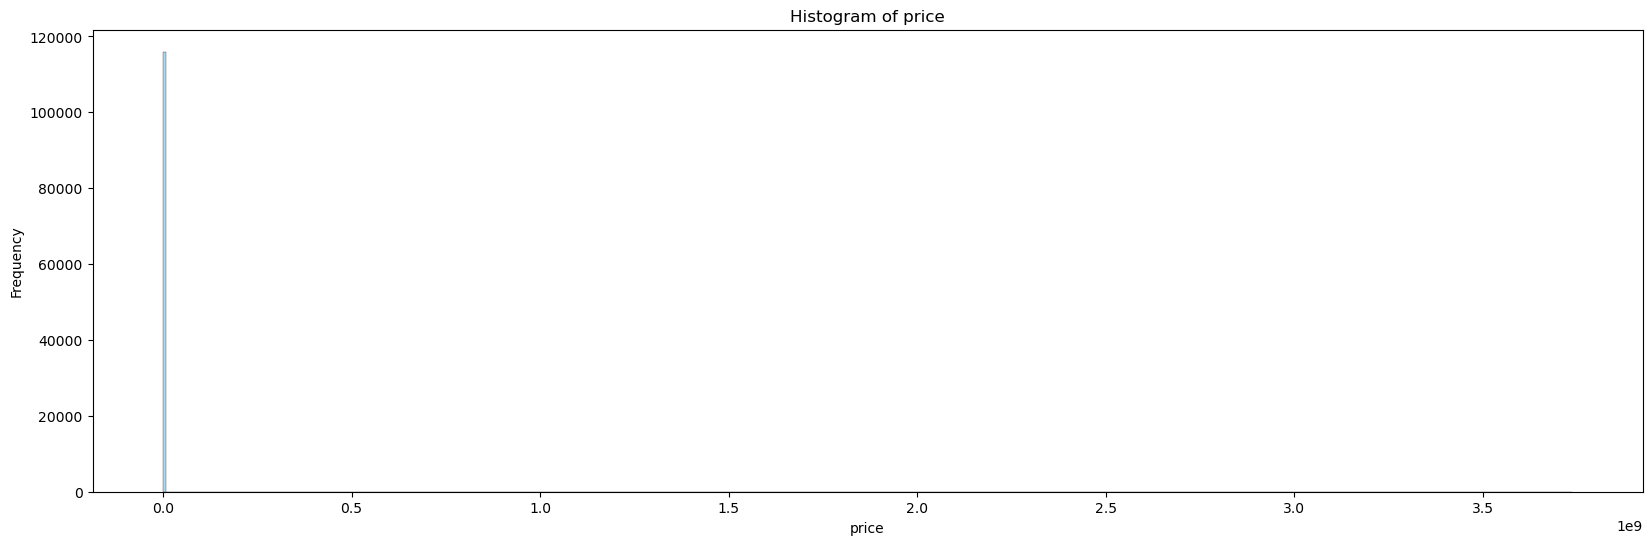

Statistics for price:
Mean: 60673.74454253889
Standard Deviation: 11465668.753583772
Variance: 131461559966907.25
Minimum: 0.0
25th Percentile: 5739.75
Median (50th Percentile): 10995.0
75th Percentile: 22900.0
Maximum: 3736928711.0


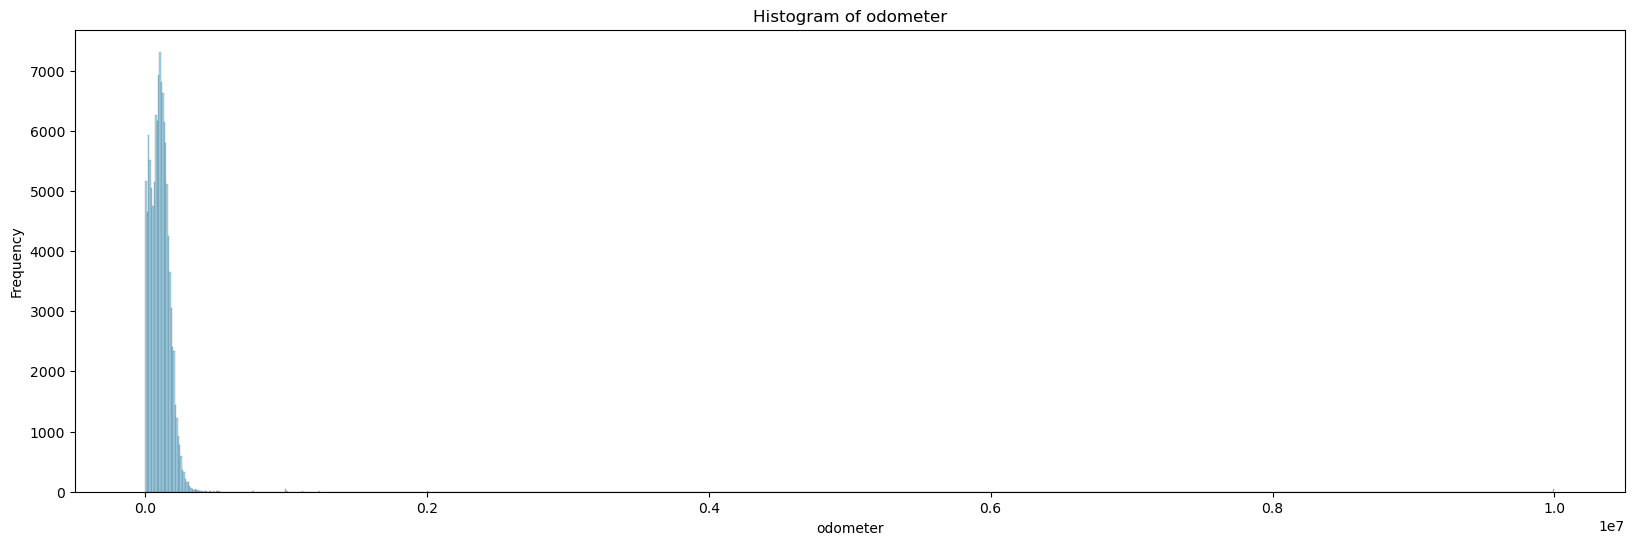

Statistics for odometer:
Mean: 111928.37270234851
Standard Deviation: 219838.4133190863
Variance: 48328927970.65343
Minimum: 0.0
25th Percentile: 55630.0
Median (50th Percentile): 102725.0
75th Percentile: 147662.0
Maximum: 10000000.0


In [6]:
consistence = ['year', 'price','odometer']
for col in consistence:
    describe_and_plot(df, col)

### 범주형 데이터
- 연도, 제조사, condition, cylinders, transmission, type, pain_color, fulel, model

In [22]:
def plot_count_bar(data, column_name):
    # 주어진 데이터프레임에서 특정 컬럼 값에 대한 count 계산
    count_data = data[column_name].value_counts()

    # count를 기준으로 내림차순 정렬
    count_data = count_data.sort_values(ascending=False)

    # 유니크 개수
    print(f'Number of unique values of {column_name}: {len(df[column_name].unique())}')
    if len(df[column_name].unique())>15:
        top_10 = count_data[:10]
        top_10 = pd.DataFrame(top_10)
        top_10.reset_index(inplace=True)
        for i in range(10, len(top_10), 10):
            print(f'Top 10 counts of {column_name}: {top_10[column_name][i]}')
    
    # seaborn barplot 그리기
    plt.figure(figsize=(20, 6))
    sns.barplot(x=count_data.index, y=count_data.values, palette="viridis")
    plt.title(f'Count of each {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Count')
    plt.title("counts : "+col)
    if len(df[column_name].unique())>15:
        plt.xticks(rotation=45, ha='right')
    #plt.xticks(rotation=45, ha='right')
    plt.show()

Number of unique values of manufacturer: 41


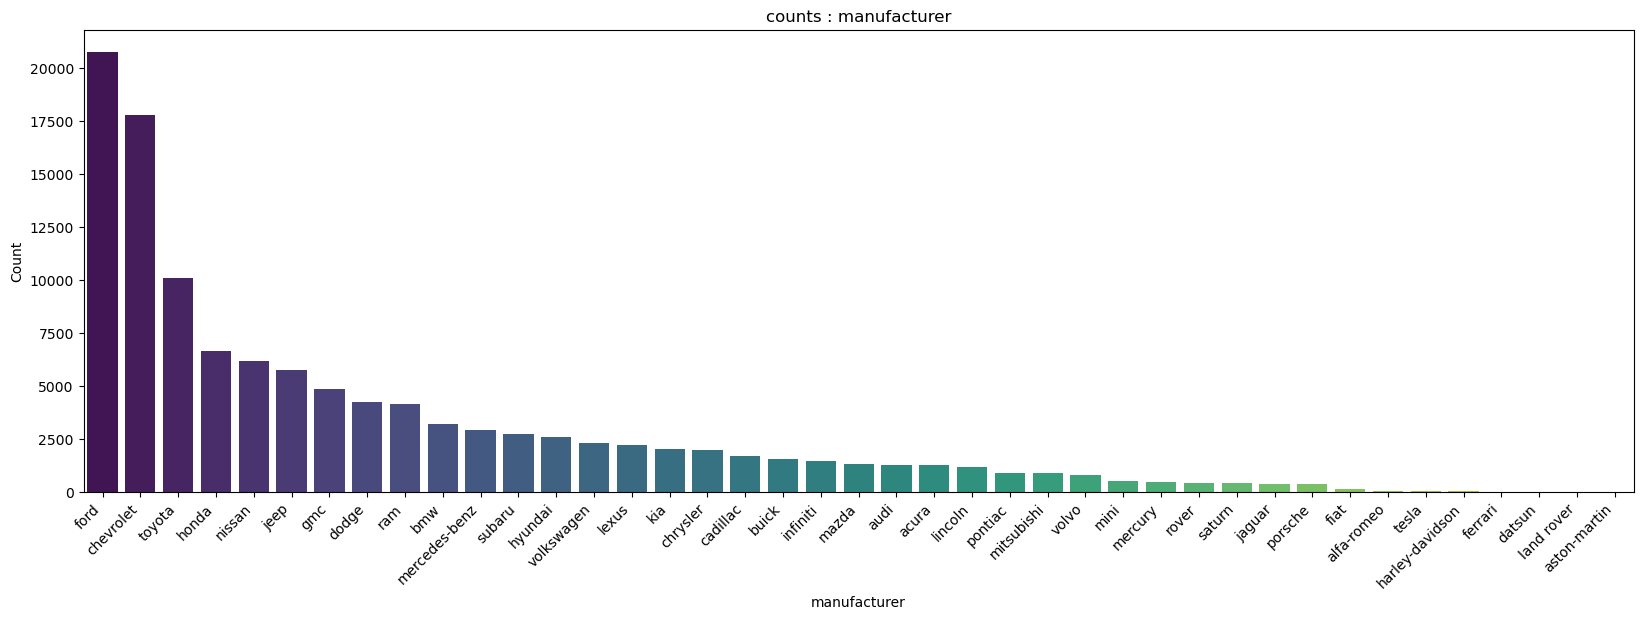

Number of unique values of condition: 6


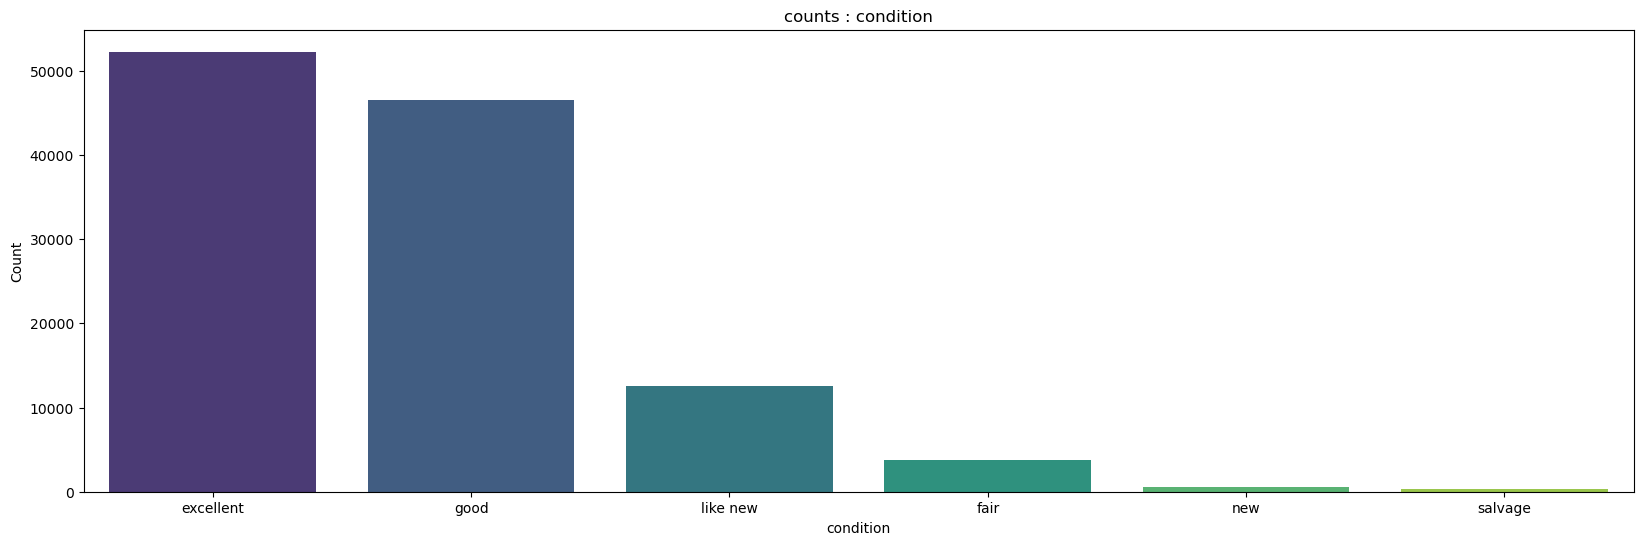

Number of unique values of cylinders: 8


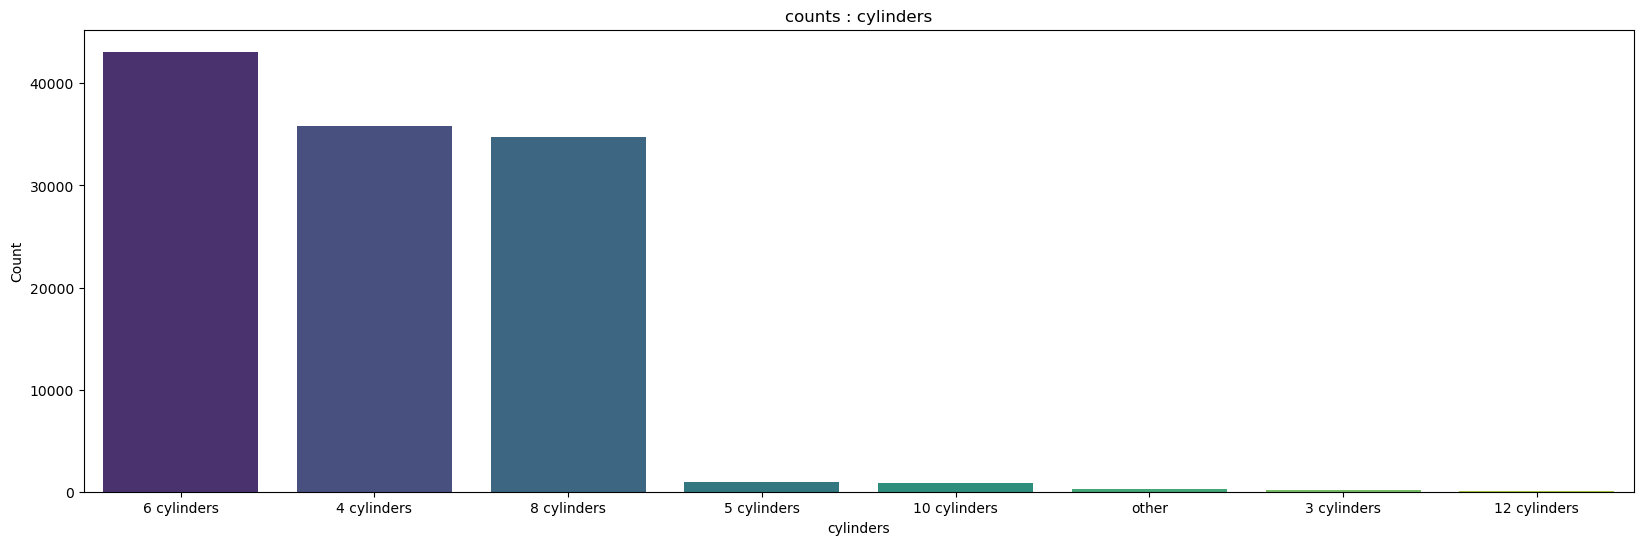

Number of unique values of fuel: 5


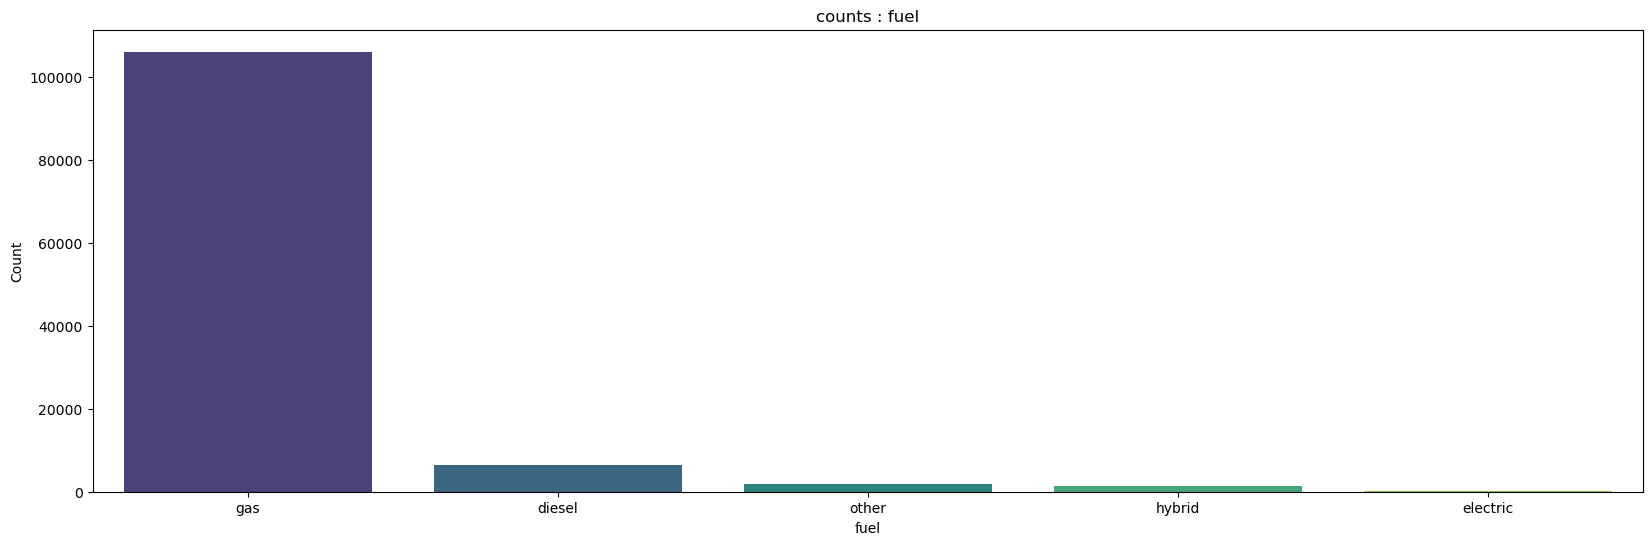

Number of unique values of transmission: 3


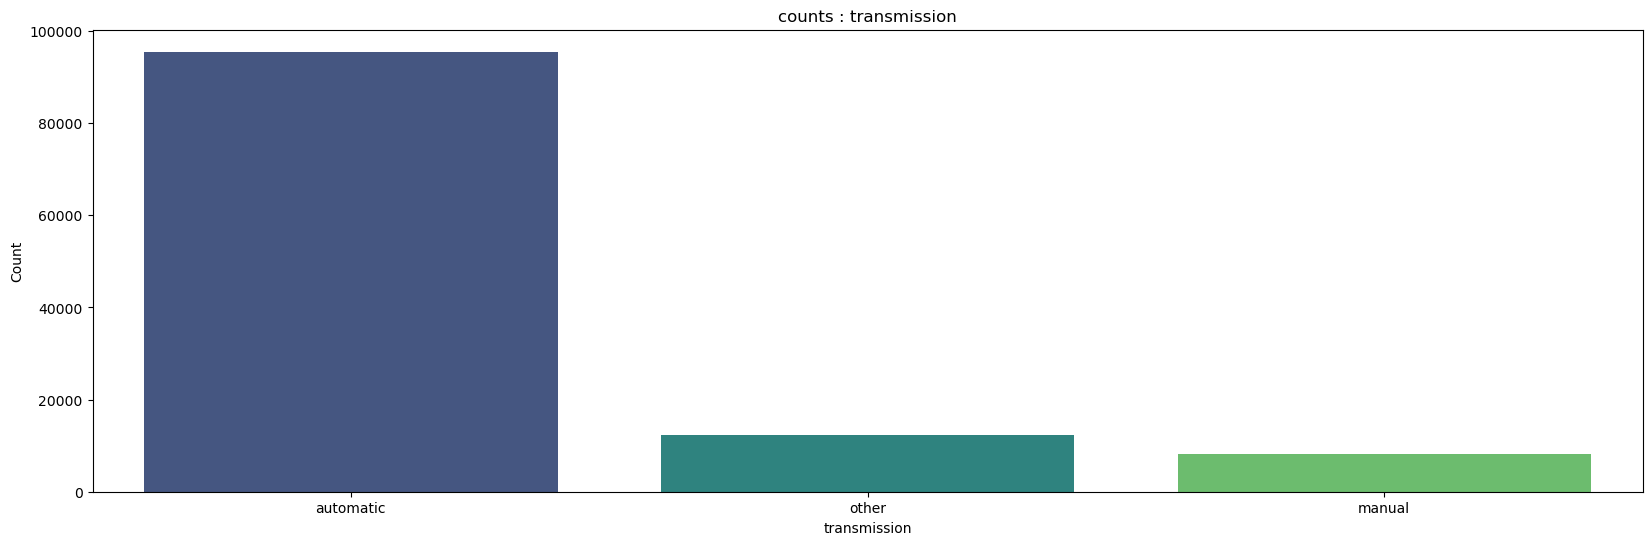

Number of unique values of drive: 3


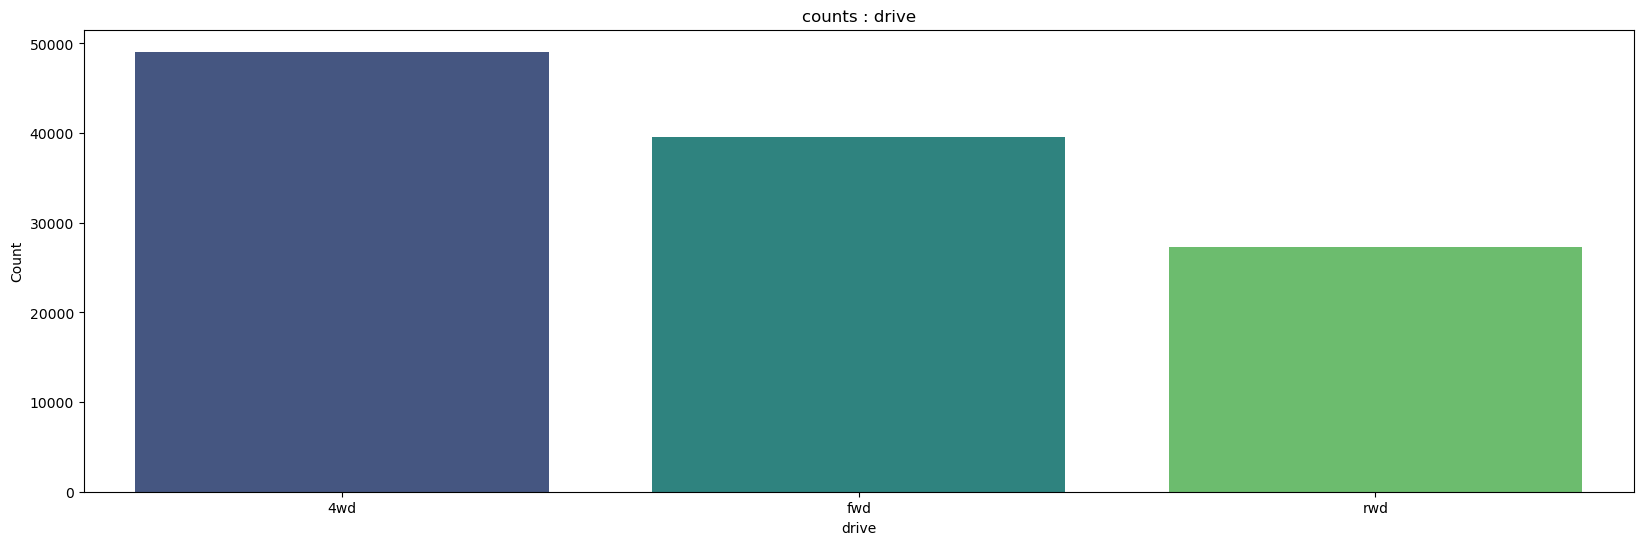

Number of unique values of type: 13


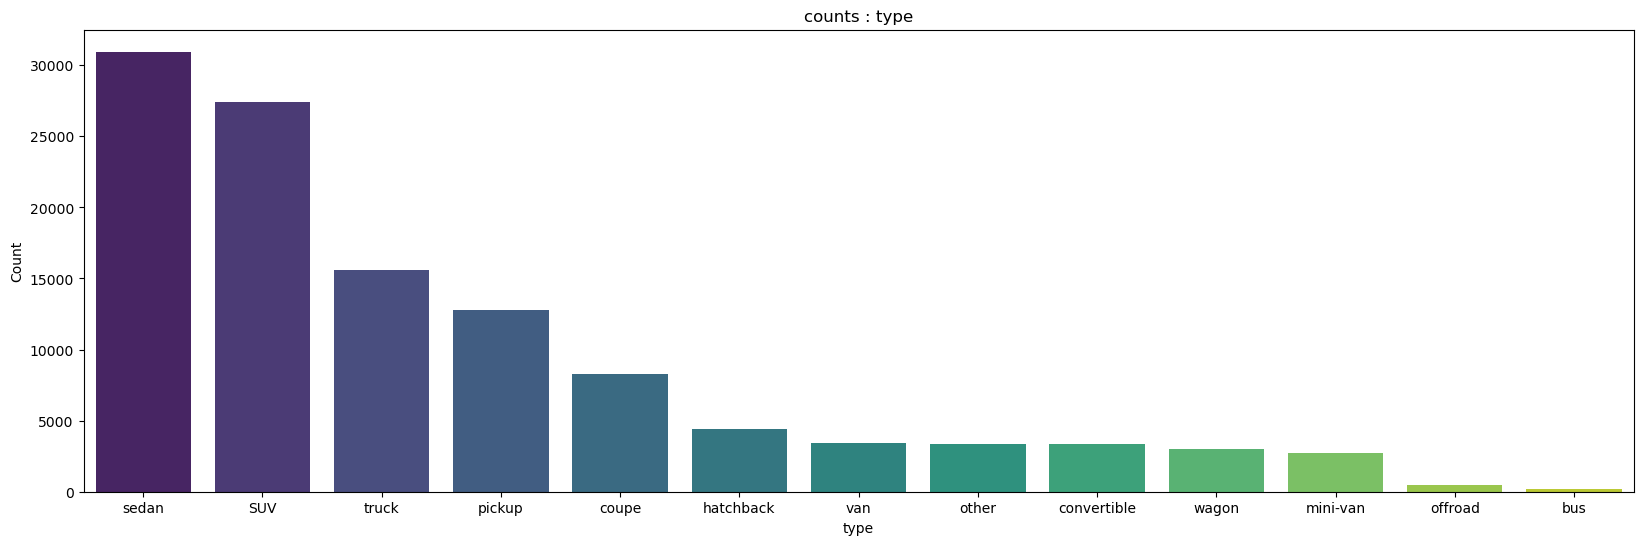

Number of unique values of paint_color: 12


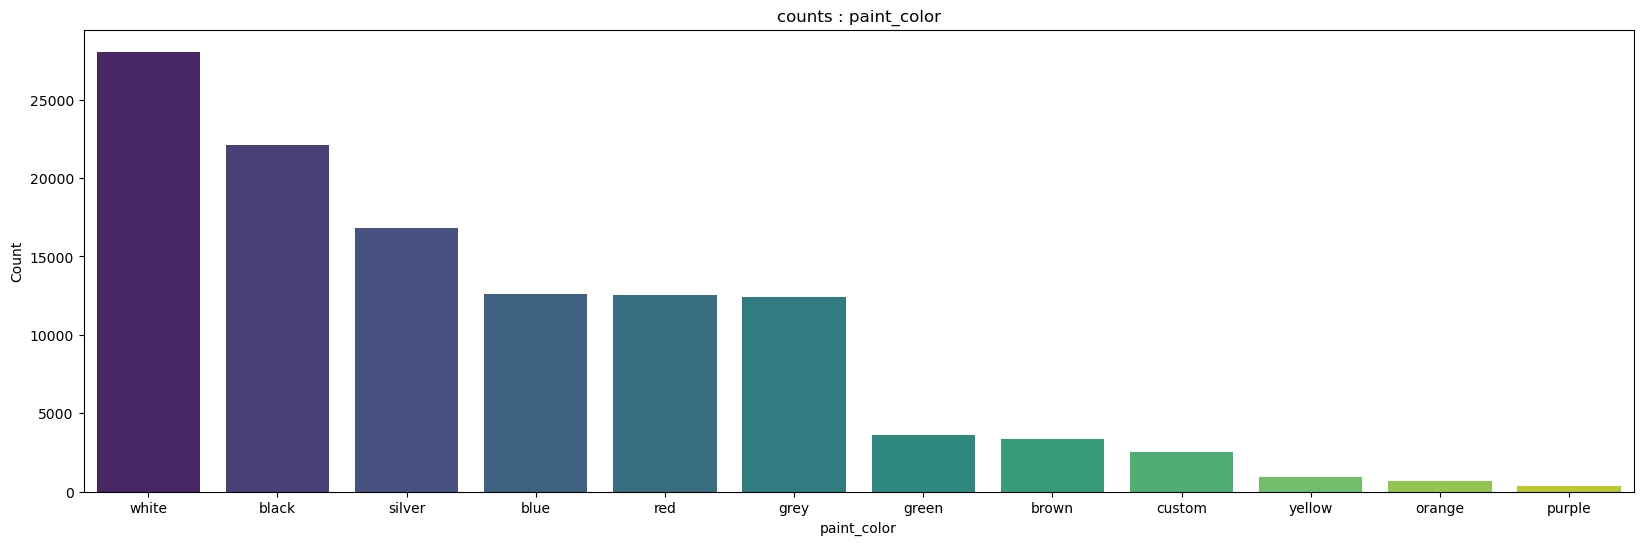

In [23]:
category_cols = ['manufacturer', 'condition', 'cylinders', 'fuel',  'transmission', 'drive', 'type', 'paint_color']
for col in category_cols:
    plot_count_bar(df, col)

### feature 간 상관관계 분석

#### 히트맵